In [1]:
from pathlib import Path

import automech
from project_utilities import p_, util, workflow

file = util.notebook_file() if util.is_notebook() else __file__
tag = util.file_tag(file)
root_path = Path("..")
par_mech = workflow.read_parent_mechanism(root_path=root_path)

In [2]:
# # Generate submechanism
# sub_tags = [
#     "1e_A_rh-oh_v0",
#     "1e_B_rh-ho2_v0",
#     "1e_C_r_v0",
#     "1e_D_r-o2_v0",
#     "0a_A_rh-oh_v0",
#     "0a_B_rh-ho2_v0",
#     "0a_C_r_v0",
#     "0a_D_r-o2_v0",
# ]
# gen_paths = [p_.generated_mechanism(t, "json", p_.data(root_path)) for t in sub_tags]
# ste_paths = [p_.stereo_mechanism(t, "json", p_.data(root_path)) for t in sub_tags]
# gen_mechs = [automech.io.read(p) for p in gen_paths]
# ste_mechs = [automech.io.read(p) for p in ste_paths]
# gen_mech = automech.combine_all(gen_mechs)
# ste_mech = automech.combine_all(ste_mechs)
# gen_mech = automech.drop_duplicate_reactions(gen_mech)
# ste_mech = automech.drop_duplicate_reactions(ste_mech)
# ste_mech = automech.drop_noncanonical_enantiomers(ste_mech)
# automech.display(gen_mech)

In [3]:
# # Prepare calculation
# # workflow.prepare_calculation(
# #     gen_mech=gen_mech, ste_mech=ste_mech, tag=tag, root_path=root_path, fake_sort=True
# # )
# workflow.augment_calculation(
#     gen_mech=gen_mech, ste_mech=ste_mech, tag=tag, root_path=root_path
# )

In [4]:
# # Identify instability reactions:
# import polars as pl

# gen_path = p_.generated_mechanism(tag, ext="json", path=p_.data(root_path))
# gen_mech = automech.io.read(gen_path)
# instab_orig_names = automech.unstable_species_names(gen_mech)

# ste_path = p_.stereo_mechanism(tag, ext="json", path=p_.data(root_path))
# ste_mech = automech.io.read(ste_path)
# ins_mech = ste_mech.model_copy()
# # ins_mech.reactions = ste_mech.reactions.filter(pl.col("orig_reactants").list.set_intersection(instab_orig_names).list.len() > 0)
# ins_mech.reactions = ste_mech.reactions.filter(
#     pl.col("orig_reactants").list.contains("OH(4)"),
#     pl.col("orig_products").list.set_intersection(instab_orig_names).list.len() > 0
# )
# ins_mech.reactions

In [5]:
# # Identify all acetylene beta scissions:
# import polars as pl

# gen_path = p_.generated_mechanism(tag, ext="json", path=p_.data(root_path))
# gen_mech = automech.io.read(gen_path)
# instab_orig_names = automech.unstable_species_names(gen_mech)

# ste_path = p_.stereo_mechanism(tag, ext="json", path=p_.data(root_path))
# ste_mech = automech.io.read(ste_path)
# ins_mech = ste_mech.model_copy()
# # ins_mech.reactions = ste_mech.reactions.filter(pl.col("orig_reactants").list.set_intersection(instab_orig_names).list.len() > 0)
# ins_mech.reactions = ste_mech.reactions.filter(
#     pl.col("orig_reactants").list.contains("C2H2(40)")
#     | pl.col("orig_products").list.contains("C2H2(40)")
# )
# ins_mech.reactions

Species:
Reactions:

*********
Reaction: S(1210)r1 = S(1209)r0
Translations:
  smiles:
    reactants = ['OO[C@@H]1[CH]C=CC1']
    products = ['OO[C@H]1C=CC[CH]1']
Rate parameters:
  This work:
    S(1210)r1 = S(1209)r0                                     56200000      1.720      44300


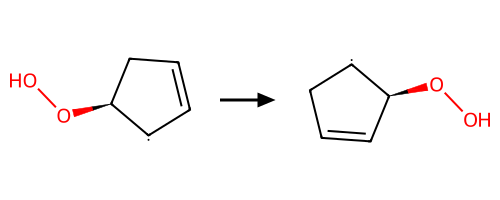

alt.Chart(...)


*********
Reaction: S(722)r0 = S(725)r1
Translations:
  smiles:
    reactants = ['OO[C@H]1[CH]CCC1']
    products = ['OO[C@@H]1C[CH]CC1']
Rate parameters:
  This work:
    S(722)r0 = S(725)r1                                          1.000      0.000      0.000
        PLOG  /  0.0009870  1.790E-45      15.44      -3137/
        PLOG  /  0.0009870  1.090E-11      5.540      13080/
        PLOG  /   0.009870  1.160E-46      15.91      -2460/
        PLOG  /   0.009870      42.10      1.980      18960/
        PLOG  /    0.09870  8.810E-14      6.000      10404/
        PLOG  /     0.9870  2.690E-18      6.950       7154/
        PLOG  /     0.9870  1.560E-15      7.830      18310/
        PLOG  /      9.870  3.520E-19      7.810       9692/
        PLOG  /      9.870  0.0005340      4.360      25300/
        PLOG  /      98.70  3.010E+78     -22.96      43340/
        PLOG  /      98.70  8.790E-35      13.18       7741/


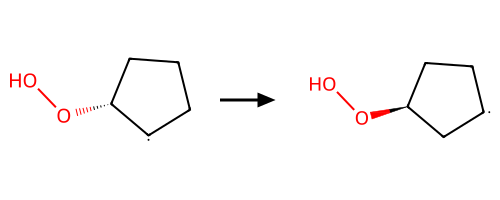

alt.Chart(...)


*********
Reaction: C5O2qarhfr = C5H8O(833) + OH(4)
Translations:
  smiles:
    reactants = ['C=CCC[CH]OO']
    products = ['C=CCCC=O', '[OH]']
Rate parameters:
  This work:
    C5O2qarhfr = C5H8O(833) + OH(4)                              1.000      0.000      0.000


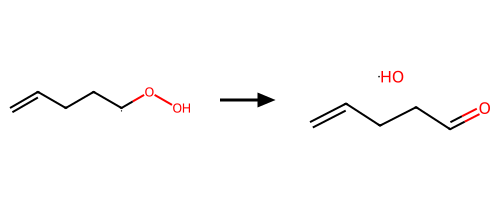

alt.Chart(...)

In [11]:
# Display species/reaction by ID
# ids_ = ["64: 1", "65: 1", "66: 1", "67: 1", "68: 1", "69: 1", "70: 1", "71: 1"]
ids_ = ["80: 1", "86: 1", "87: 1"]

#   - Read in expanded mechanism
mech_path = p_.stereo_mechanism(tag, ext="json", path=p_.data(root_path))
mech = automech.io.read(mech_path)

rxn_chans = [id_ for id_ in ids_ if ":" in id_]
spc_ids = [id_ for id_ in ids_ if ":" not in id_]

#   - Display the reaction
print("Species:")
automech.display_species(mech, ids=spc_ids)
print("Reactions:")
automech.display_reactions(mech, chans=rxn_chans)